In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN','NAME','ORGANIZATION','STATUS','SPECIAL_CONSIDERATIONS'], axis=1)

In [3]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts = application_df.groupby(["APPLICATION_TYPE"]).size().sort_values(ascending=False)

# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = application_type_counts[application_type_counts < 500].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [4]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = application_df.groupby(["CLASSIFICATION"]).size().sort_values(ascending=False)

# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = classification_counts[classification_counts < 1000].index

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
Other,2261
C3000,1918
C2100,1883


In [5]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_encoded = pd.get_dummies(application_df)

In [6]:
# Split the data into features and target
X = application_df_encoded.drop(columns=['IS_SUCCESSFUL'])
y = application_df_encoded['IS_SUCCESSFUL']

In [7]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Build the model with additional hidden layers
nn_1 = tf.keras.models.Sequential()

# First hidden layer
nn_1.add(tf.keras.layers.Dense(units=100, activation='relu', input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=80, activation='relu'))

# Third hidden layer
nn_1.add(tf.keras.layers.Dense(units=50, activation='relu'))

# Output layer
nn_1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
nn_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model
history_1 = nn_1.fit(X_train_scaled, y_train, epochs=200, batch_size=54, validation_data=(X_test_scaled, y_test))

Epoch 1/200
509/509 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7148 - loss: 0.5845 - val_accuracy: 0.7216 - val_loss: 0.5766
Epoch 2/200
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7277 - loss: 0.5620 - val_accuracy: 0.7223 - val_loss: 0.5699
Epoch 3/200
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7286 - loss: 0.5581 - val_accuracy: 0.7239 - val_loss: 0.5684
Epoch 4/200
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7249 - loss: 0.5575 - val_accuracy: 0.7243 - val_loss: 0.5701
Epoch 5/200
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7279 - loss: 0.5569 - val_accuracy: 0.7210 - val_loss: 0.5691
Epoch 6/200
509/509 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7281 - loss: 0.5590 - val_accuracy: 0.7220 - val_loss: 0.5687
Epoch 7/200
509/509 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7279 - loss: 0.5566 - val_accuracy: 0.7229 - val_loss: 0.5702
Epoch 8/200
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7276 - loss: 0.5571 - val_accu

In [12]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 1s - 3ms/step - accuracy: 0.7248 - loss: 0.6017
Loss: 0.6016892194747925, Accuracy: 0.724781334400177


In [13]:
# Export our model to HDF5 file
nn_1.save("AlphabetSoupCharity_Attempt1.h5")

In [14]:
# Download h5 file
from google.colab import files
files.download("AlphabetSoupCharity_Attempt1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# Define the model with Dropout layers
nn_dropout = tf.keras.models.Sequential()

# First hidden layer with 100 neurons and dropout
nn_dropout.add(tf.keras.layers.Dense(units=100, activation='relu', input_dim=X_train_scaled.shape[1]))
nn_dropout.add(tf.keras.layers.Dropout(0.2))  # Dropout layer with 20% dropout

# Second hidden layer with 50 neurons and dropout
nn_dropout.add(tf.keras.layers.Dense(units=50, activation='relu'))
nn_dropout.add(tf.keras.layers.Dropout(0.2))  # Dropout layer with 20% dropout

# Output layer
nn_dropout.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [16]:
# Compile the model
nn_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# Train the model
history_dropout = nn_dropout.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6883 - loss: 0.6118 - val_accuracy: 0.7187 - val_loss: 0.5736
Epoch 2/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7235 - loss: 0.5710 - val_accuracy: 0.7230 - val_loss: 0.5711
Epoch 3/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7215 - loss: 0.5684 - val_accuracy: 0.7217 - val_loss: 0.5684
Epoch 4/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7238 - loss: 0.5670 - val_accuracy: 0.7236 - val_loss: 0.5676
Epoch 5/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7269 - loss: 0.5637 - val_accuracy: 0.7211 - val_loss: 0.5688
Epoch 6/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7244 - loss: 0.5653 - val_accuracy: 0.7232 - val_loss: 0.5675
Epoch 7/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7255 - loss: 0.5642 - val_accuracy: 0.7232 - val_loss: 0.5680
Epoch 8/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7219 - loss: 0.5641 - val_acc

In [18]:
# Evaluate the model
model_loss_dropout, model_accuracy_dropout = nn_dropout.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss_dropout}, Accuracy: {model_accuracy_dropout}")

215/215 - 0s - 1ms/step - accuracy: 0.7238 - loss: 0.5684
Loss: 0.568432092666626, Accuracy: 0.7237609624862671


In [19]:
# Export our model to HDF5 file
nn_dropout.save("AlphabetSoupCharity_Attempt2.h5")

In [20]:
# Download h5 file
from google.colab import files
files.download("AlphabetSoupCharity_Attempt2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# Define the model with Leaky ReLU activation
nn_leaky_relu = tf.keras.models.Sequential()

# First hidden layer with Leaky ReLU activation
nn_leaky_relu.add(tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))
nn_leaky_relu.add(tf.keras.layers.Dense(units=100))
nn_leaky_relu.add(tf.keras.layers.LeakyReLU(negative_slope=0.1))  # Use negative_slope instead of alpha

# Second hidden layer with Leaky ReLU activation
nn_leaky_relu.add(tf.keras.layers.Dense(units=50))
nn_leaky_relu.add(tf.keras.layers.LeakyReLU(negative_slope=0.1))  # Use negative_slope

# Output layer
nn_leaky_relu.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [22]:
# Compile the model
nn_leaky_relu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# Train the model
history_leaky_relu = nn_leaky_relu.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6984 - loss: 0.5918 - val_accuracy: 0.7213 - val_loss: 0.5706
Epoch 2/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7274 - loss: 0.5622 - val_accuracy: 0.7203 - val_loss: 0.5721
Epoch 3/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7282 - loss: 0.5594 - val_accuracy: 0.7220 - val_loss: 0.5702
Epoch 4/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7276 - loss: 0.5614 - val_accuracy: 0.7223 - val_loss: 0.5713
Epoch 5/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7299 - loss: 0.5588 - val_accuracy: 0.7184 - val_loss: 0.5703
Epoch 6/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7289 - loss: 0.5557 - val_accuracy: 0.7213 - val_loss: 0.5682
Epoch 7/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7284 - loss: 0.5551 - val_accuracy: 0.7207 - val_loss: 0.5688
Epoch 8/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7265 - loss: 0.5594 - val_accu

In [24]:
# Evaluate the model
model_loss_leaky_relu, model_accuracy_leaky_relu = nn_leaky_relu.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss_leaky_relu}, Accuracy: {model_accuracy_leaky_relu}")

215/215 - 0s - 1ms/step - accuracy: 0.7238 - loss: 0.5703
Loss: 0.570347249507904, Accuracy: 0.7237609624862671


In [25]:
# Export our model to HDF5 file
nn_leaky_relu.save("AlphabetSoupCharity_Attempt3.h5")

In [26]:
# Download h5 file
from google.colab import files
files.download("AlphabetSoupCharity_Attempt3.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
import matplotlib.pyplot as plt

In [34]:
# Helper function to plot accuracy and loss and save the images
def plot_history_and_save(history, model_name, file_name):

    # Plot accuracy
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Save the plot as an image file
    plt.tight_layout()
    plt.savefig(file_name)

    # If in Google Colab, download the image
    files.download(file_name)
    plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

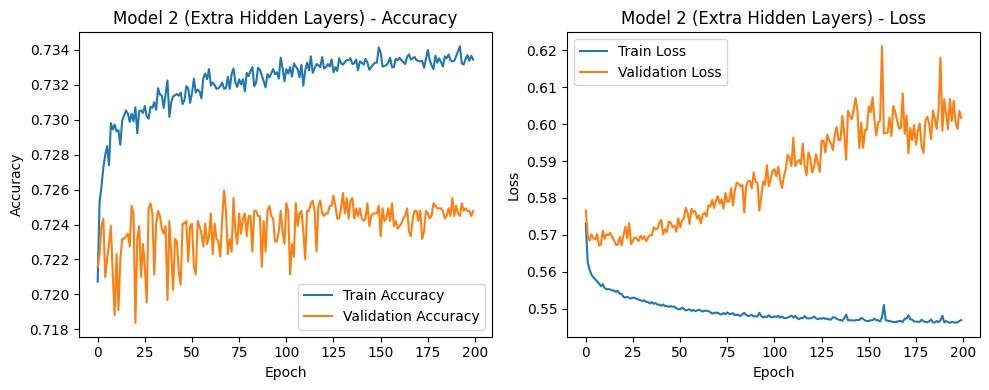

In [35]:
# Generate plot for model 2 optimization and save
plot_history_and_save(history_1, "Model 2 (Extra Hidden Layers)", "model_2_extra_hidden_layers.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

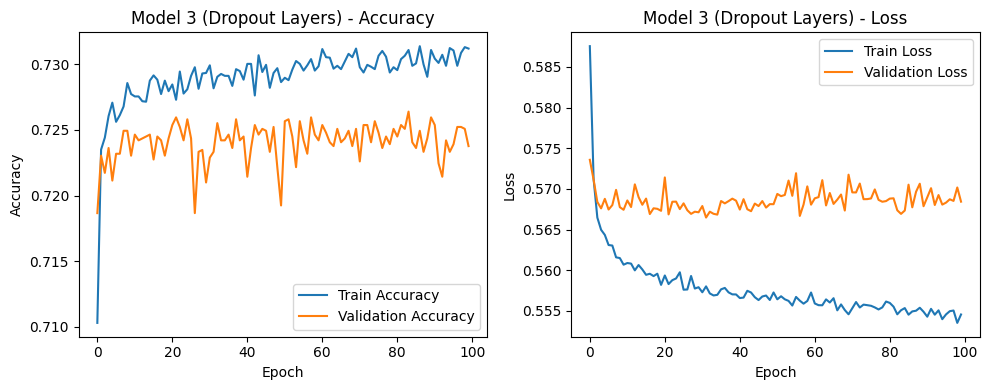

In [36]:
# Generate plot for model 3 optimization and save
plot_history_and_save(history_dropout, "Model 3 (Dropout Layers)", "model_3_dropout_layers.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

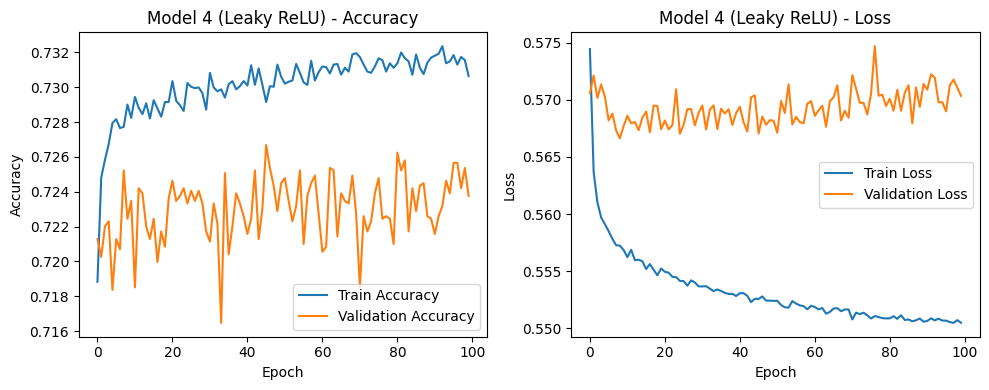

In [37]:
# Generate plot for model 4 optimization and save
plot_history_and_save(history_leaky_relu, "Model 4 (Leaky ReLU)", "model_4_leaky_relu.png")